# Minor Project 2 - Linear Regression


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Import Dataset

In [50]:
df = pd.read_csv("/content/co2.csv")

## Initial Analysis

In [51]:
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [53]:
print(df.describe(include = 'all'))

        Make      Model Vehicle Class  Engine Size(L)    Cylinders  \
count   7385       7385          7385     7385.000000  7385.000000   
unique    42       2053            16             NaN          NaN   
top     FORD  F-150 FFV   SUV - SMALL             NaN          NaN   
freq     628         32          1217             NaN          NaN   
mean     NaN        NaN           NaN        3.160068     5.615030   
std      NaN        NaN           NaN        1.354170     1.828307   
min      NaN        NaN           NaN        0.900000     3.000000   
25%      NaN        NaN           NaN        2.000000     4.000000   
50%      NaN        NaN           NaN        3.000000     6.000000   
75%      NaN        NaN           NaN        3.700000     6.000000   
max      NaN        NaN           NaN        8.400000    16.000000   

       Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
count          7385      7385                       7385.000000   
unique           27      

## Check for Duplicates

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: float64(


## Outlier Detection and Correction






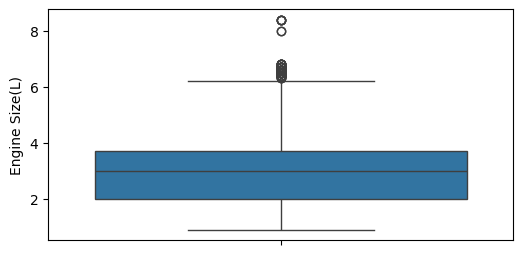

<Figure size 640x480 with 0 Axes>

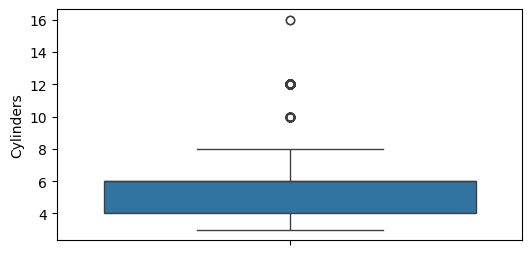

<Figure size 640x480 with 0 Axes>

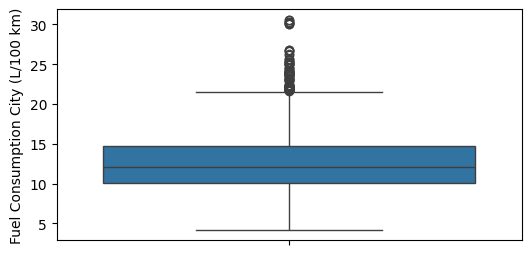

<Figure size 640x480 with 0 Axes>

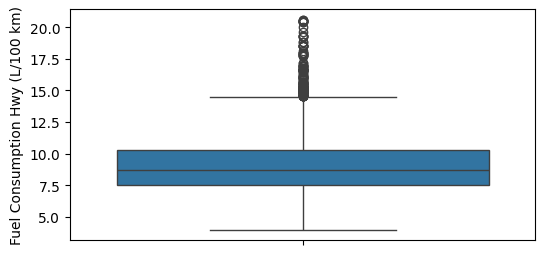

<Figure size 640x480 with 0 Axes>

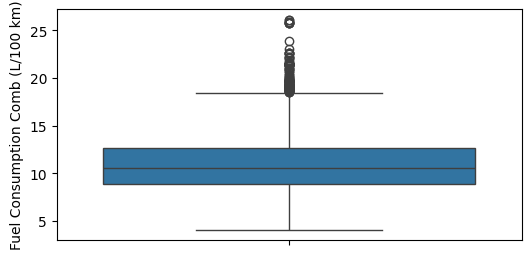

<Figure size 640x480 with 0 Axes>

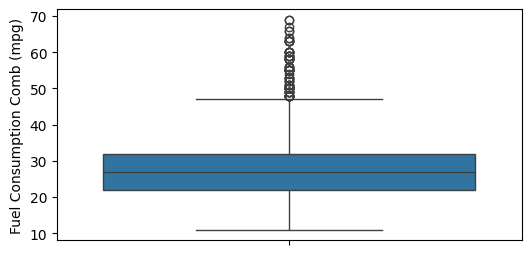

<Figure size 640x480 with 0 Axes>

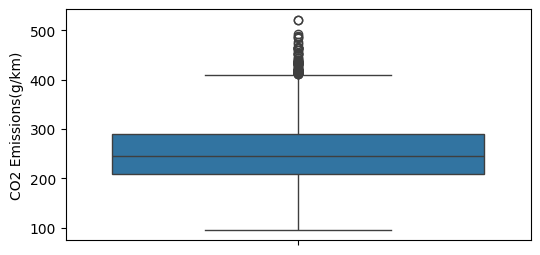

<Figure size 640x480 with 0 Axes>

In [56]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)


In [57]:
def outlier_correction(df, col, show_plot=True):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

    return df

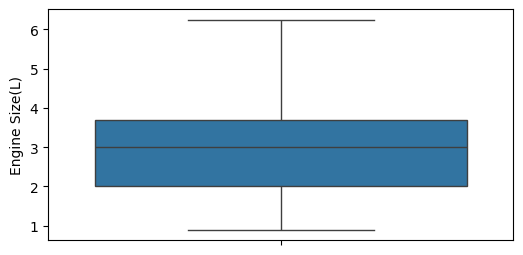

<Figure size 640x480 with 0 Axes>

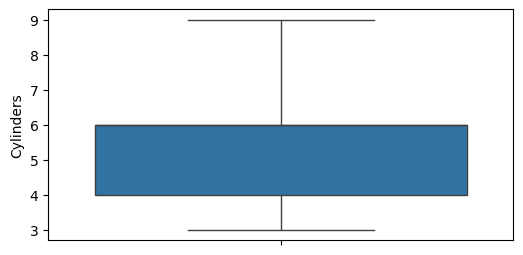

<Figure size 640x480 with 0 Axes>

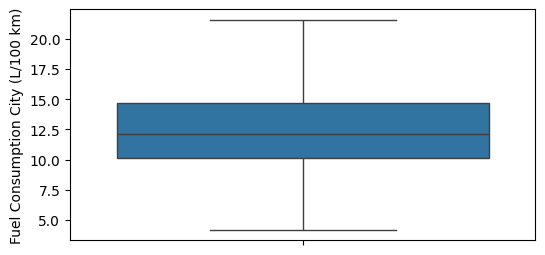

<Figure size 640x480 with 0 Axes>

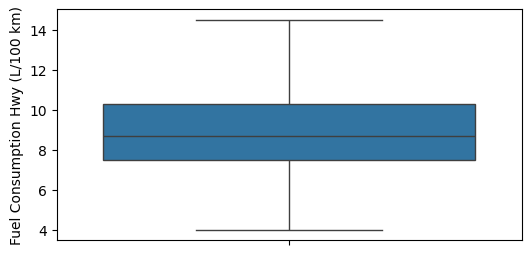

<Figure size 640x480 with 0 Axes>

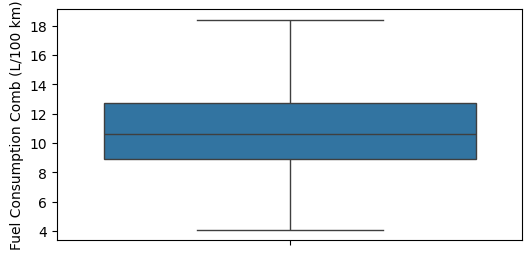

<Figure size 640x480 with 0 Axes>

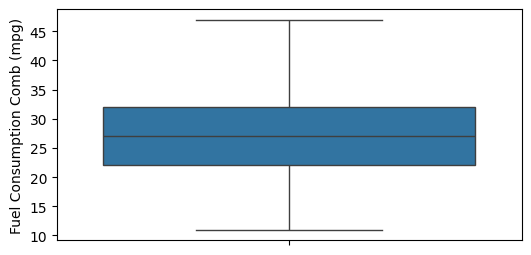

<Figure size 640x480 with 0 Axes>

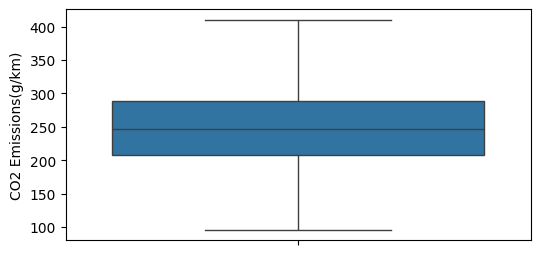

<Figure size 640x480 with 0 Axes>

In [58]:
for col in num_cols:
    df = outlier_correction(df, col, show_plot=True)
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)

## Handling Missing Values

In [59]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["float64", "int64"]:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)


In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   float64
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   float64
 11  CO2 Emissions(g/km)               6282 non-null   float64
dtypes: float64(

## Univariate Analysis

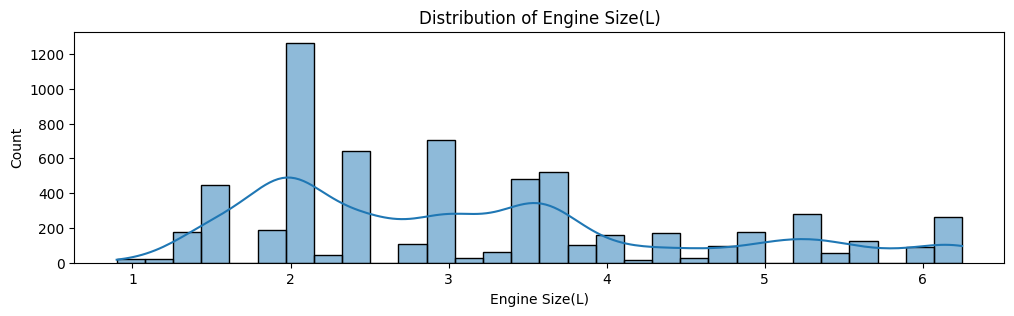

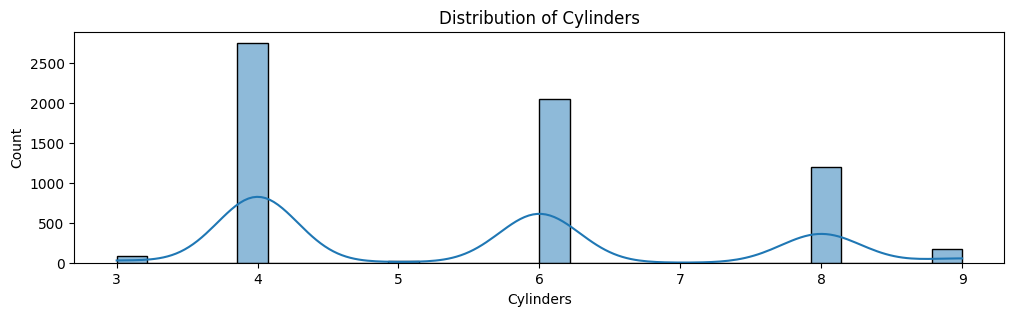

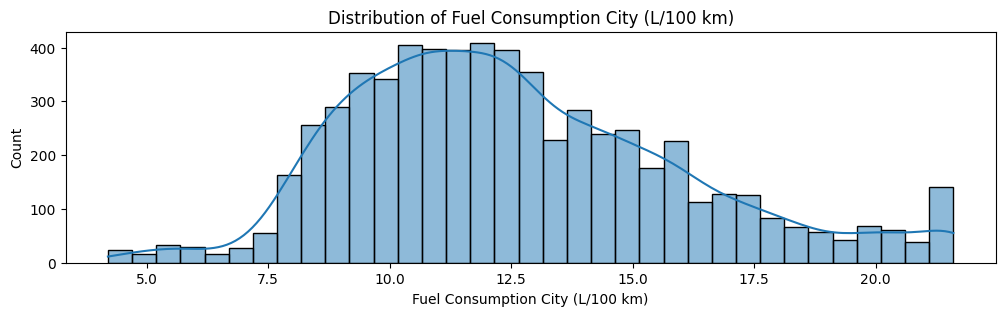

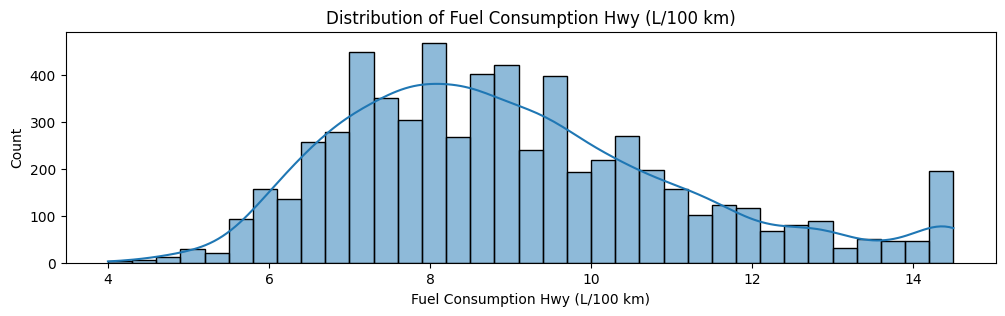

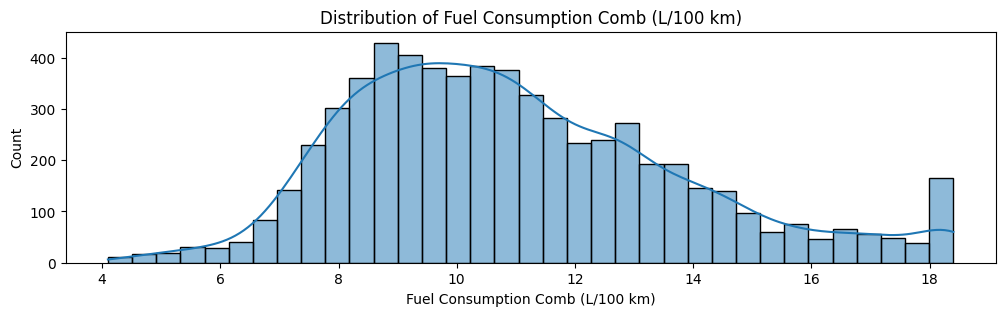

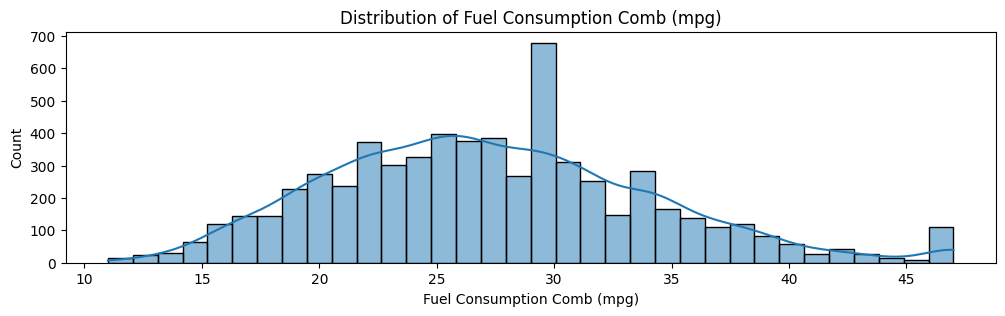

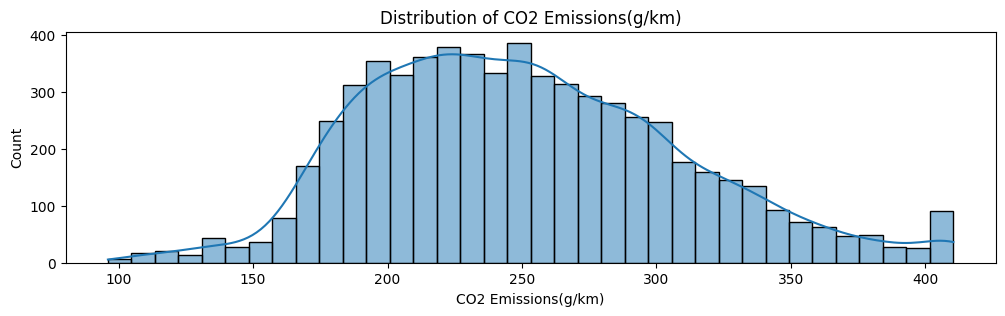

In [61]:
for col in df.select_dtypes(include=["float64", "int64"]).columns:
  plt.figure(figsize=(12,3))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

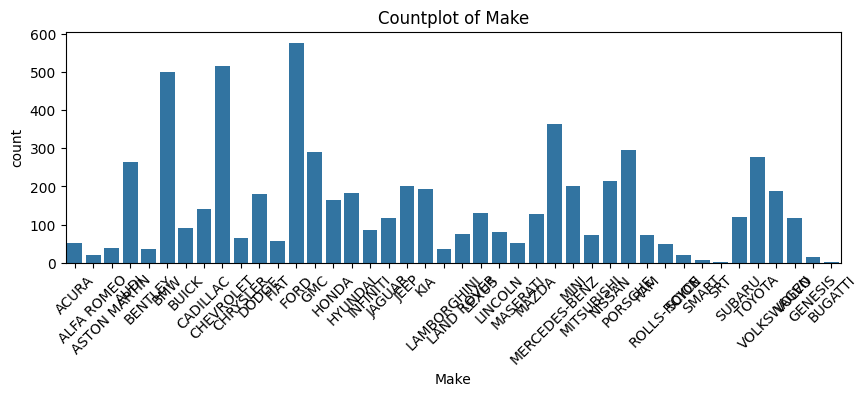

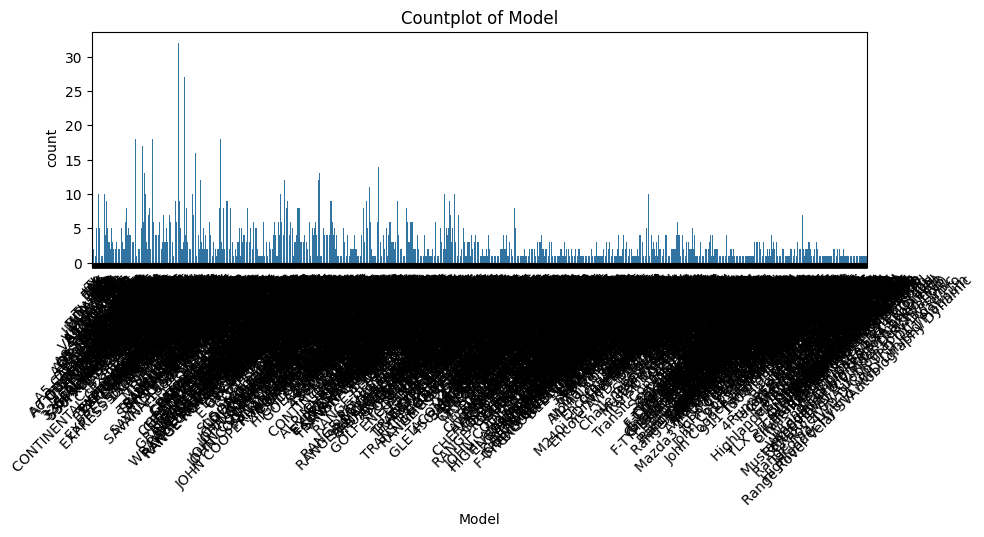

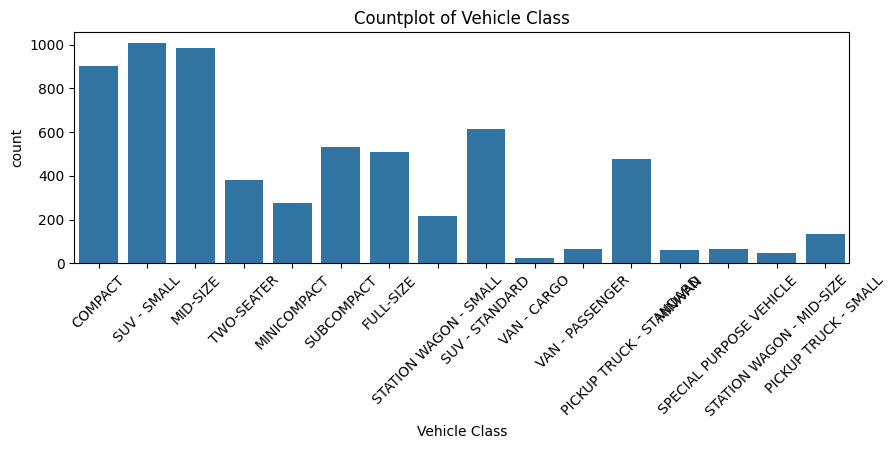

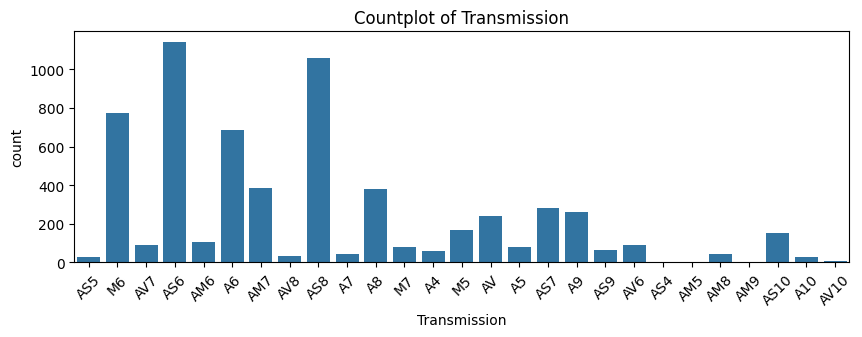

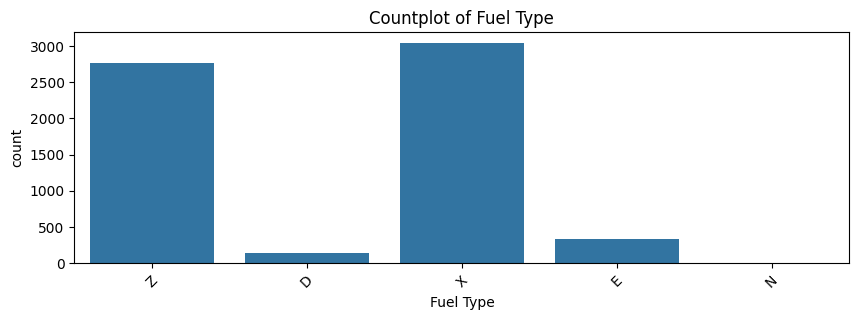

In [62]:
for col in df.select_dtypes(include=["object", "category"]).columns:
  plt.figure(figsize=(10,3))
  sns.countplot(x=df[col])
  plt.title(f"Countplot of {col}")
  plt.xticks(rotation=45)
  plt.show()

## Bivariate Analysis

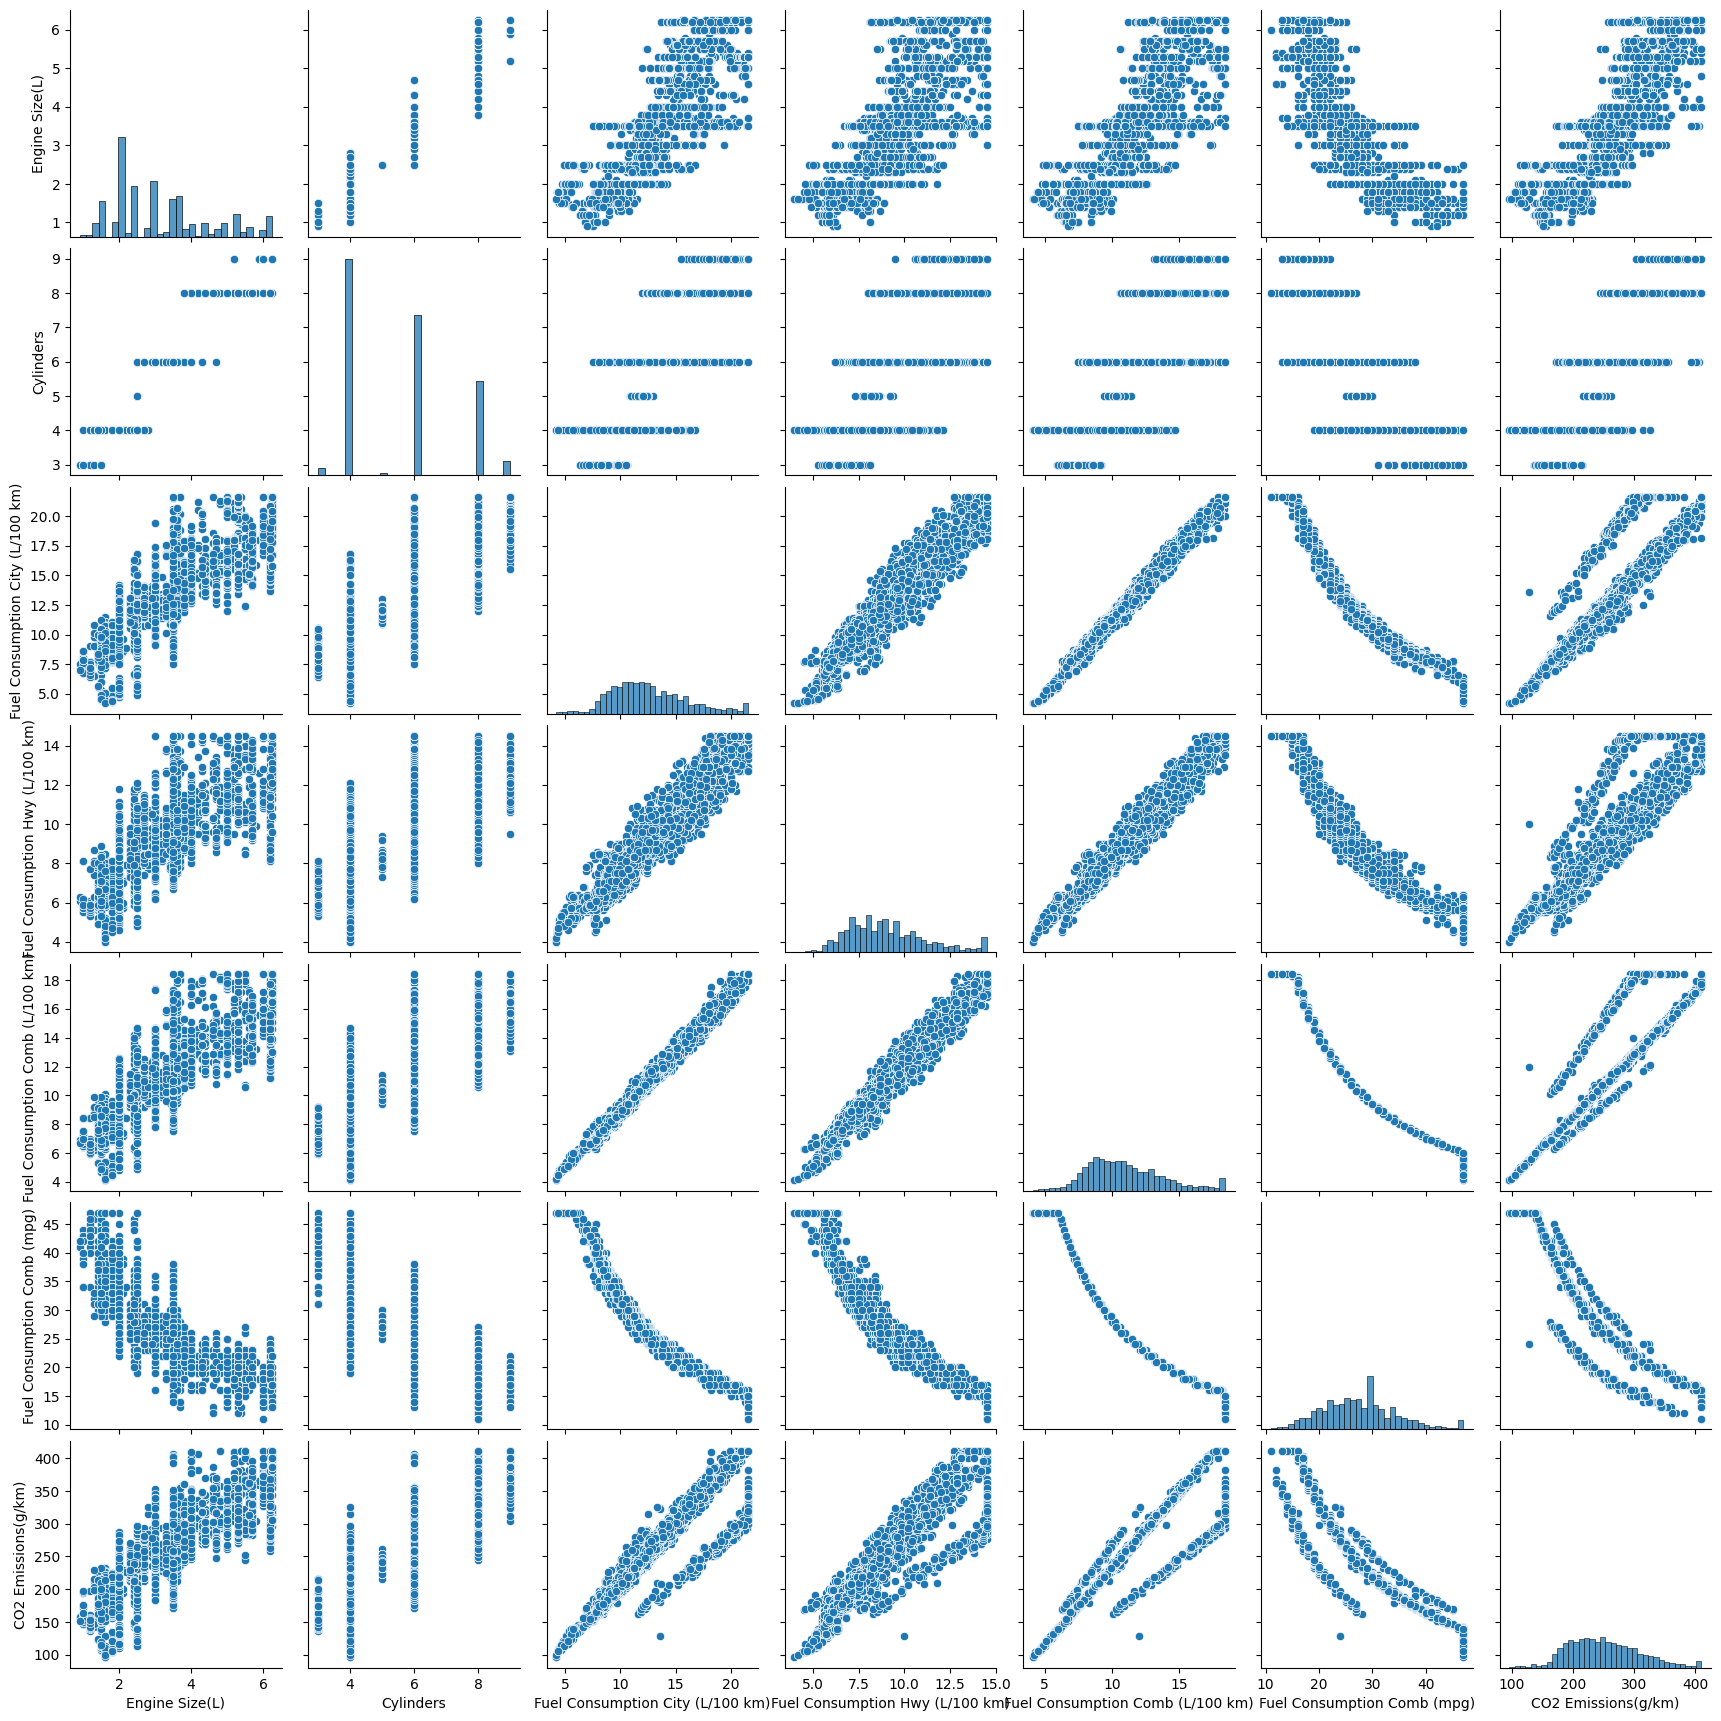

In [63]:
sns.pairplot(df[num_cols])
plt.show()

## Correlation and Heatmap

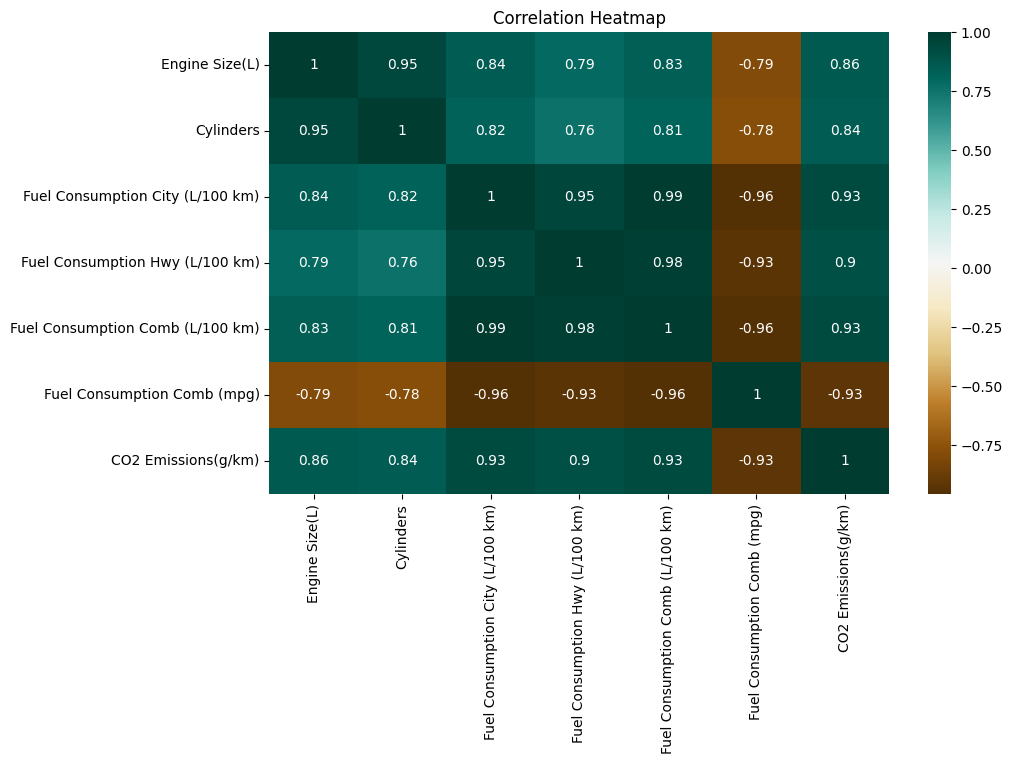

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="BrBG")
plt.title("Correlation Heatmap")
plt.show()

## Normalisation and Scaling

In [65]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT       -0.858034  -0.941941          AS5   
1  ACURA         ILX       COMPACT       -0.560647  -0.941941           M6   
2  ACURA  ILX HYBRID       COMPACT       -1.229767  -0.941941          AV7   
3  ACURA     MDX 4WD   SUV - SMALL        0.257166   0.276733          AS6   
4  ACURA     RDX AWD   SUV - SMALL        0.257166   0.276733          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                         -0.779197   
1         Z                         -0.400067   
2         Z                         -1.916586   
3         Z                          0.037390   
4         Z                         -0.137593   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.089352                         -0.878115   
1                        -0.621091                         -0.488642   
2                   

## Simple Linear Regression

In [74]:
X = df[['Fuel Consumption Comb (L/100 km)']]
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Coefficient (slope): 0.9240
Intercept: -0.0033


In [76]:
y_pred = model.predict(X_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.1459
Root Mean Squared Error (RMSE): 0.3820
Mean Absolute Error (MAE): 0.2301
R-squared (R²): 0.8578


In [78]:
y_pred = model.predict(X)

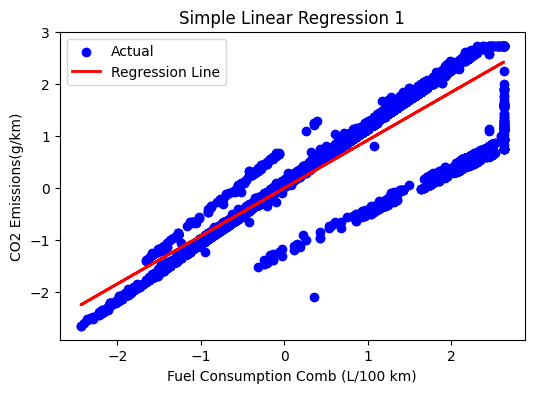

In [79]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Simple Linear Regression 1')
plt.legend()
plt.show()

In [80]:
X = df[['Fuel Consumption Hwy (L/100 km)']]
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Coefficient (slope): 0.8998
Intercept: -0.0061


In [82]:
y_pred = model.predict(X_test)

In [83]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.1911
Root Mean Squared Error (RMSE): 0.4371
Mean Absolute Error (MAE): 0.2930
R-squared (R²): 0.8138


In [84]:
y_pred = model.predict(X)

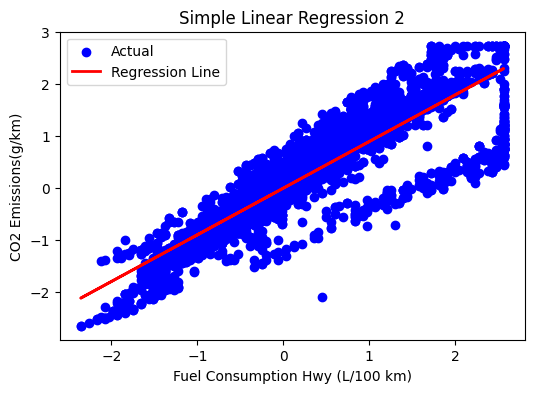

In [85]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Simple Linear Regression 2')
plt.legend()
plt.show()

In [86]:
X = df[['Fuel Consumption City (L/100 km)']]
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Coefficient (slope): 0.9225
Intercept: -0.0023


In [88]:
y_pred = model.predict(X_test)

In [89]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.1525
Root Mean Squared Error (RMSE): 0.3905
Mean Absolute Error (MAE): 0.2428
R-squared (R²): 0.8514


In [90]:
y_pred = model.predict(X)

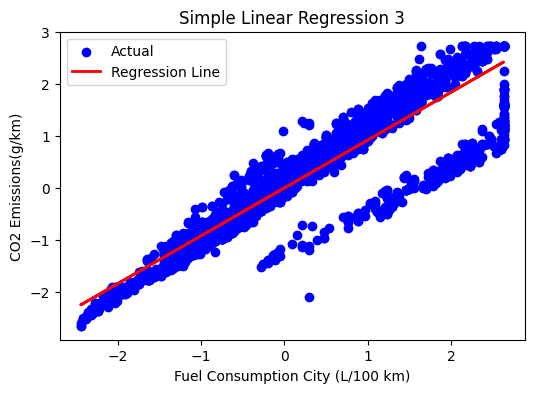

In [91]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Simple Linear Regression 3')
plt.legend()
plt.show()

In [92]:
X = df[['Fuel Consumption Comb (mpg)']]
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Coefficient (slope): -0.9260
Intercept: -0.0033


In [94]:
y_pred = model.predict(X_test)

In [95]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.1520
Root Mean Squared Error (RMSE): 0.3899
Mean Absolute Error (MAE): 0.2598
R-squared (R²): 0.8518


In [96]:
y_pred = model.predict(X)

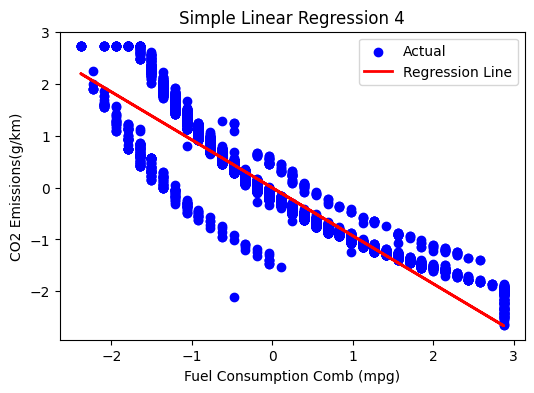

In [97]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Simple Linear Regression 4')
plt.legend()
plt.show()

## Encoding

In [98]:
df = pd.get_dummies(df, drop_first=False).astype(int)

print(df.head())

   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0               0          0                                 0   
1               0          0                                 0   
2              -1          0                                -1   
3               0          0                                 0   
4               0          0                                 0   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                               -1                                 0   
1                                0                                 0   
2                               -1                                -1   
3                                0                                 0   
4                                0                                 0   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_ACURA  \
0                            0                    0           1   
1                            0      

## Multiple Linear Regression

In [99]:
X = df.drop(columns=['CO2 Emissions(g/km)'])
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
print(f"Intercept: {model.intercept_:.4f}")
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"  {col}: {coef:.4f}")

Intercept: 0.0043
Coefficients:
  Engine Size(L): 0.0702
  Cylinders: 0.0980
  Fuel Consumption City (L/100 km): 0.1460
  Fuel Consumption Hwy (L/100 km): 0.1404
  Fuel Consumption Comb (L/100 km): 0.0084
  Fuel Consumption Comb (mpg): -0.4319
  Make_ACURA: -0.0439
  Make_ALFA ROMEO: -0.0258
  Make_ASTON MARTIN: 0.1525
  Make_AUDI: 0.0117
  Make_BENTLEY: 0.4314
  Make_BMW: -0.0196
  Make_BUGATTI: 0.0861
  Make_BUICK: -0.0680
  Make_CADILLAC: -0.0229
  Make_CHEVROLET: -0.1204
  Make_CHRYSLER: 0.0432
  Make_DODGE: 0.0173
  Make_FIAT: -0.0403
  Make_FORD: -0.0509
  Make_GENESIS: 0.0615
  Make_GMC: -0.2046
  Make_HONDA: -0.1892
  Make_HYUNDAI: -0.0803
  Make_INFINITI: 0.0051
  Make_JAGUAR: 0.0598
  Make_JEEP: 0.0194
  Make_KIA: -0.1640
  Make_LAMBORGHINI: 0.5095
  Make_LAND ROVER: -0.2863
  Make_LEXUS: -0.1421
  Make_LINCOLN: 0.0122
  Make_MASERATI: 0.0638
  Make_MAZDA: -0.2251
  Make_MERCEDES-BENZ: 0.0879
  Make_MINI: -0.0888
  Make_MITSUBISHI: 0.0532
  Make_NISSAN: -0.1087
  Make_PORSCHE

In [101]:
y_pred = model.predict(X_test)

In [102]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0727
Root Mean Squared Error (RMSE): 0.2695
Mean Absolute Error (MAE): 0.1531
R-squared (R²): 0.8547


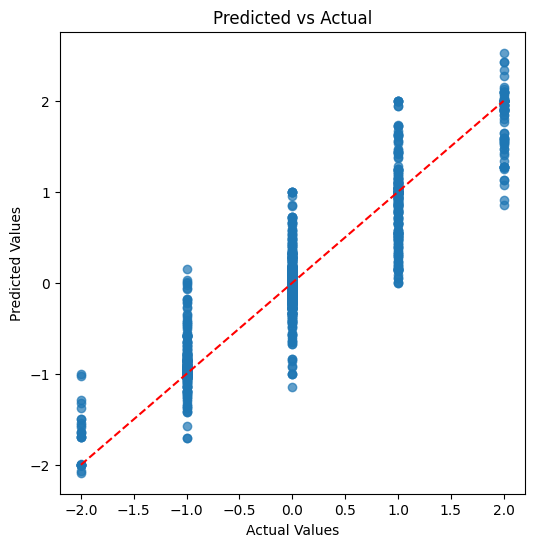

In [103]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()